In [1]:
# Run through each each cleaned post and run VADER Sentiment analysis 

In [4]:
import pandas as pd

# Temp file path
filepath = "/home/quinton/Documents/COMET_data/twitter_comet/Twts1722-Labeled-k5k10-Cos-Euc-METADATA.csv"

# Load the data
twitter_data = pd.read_csv(filepath)

twitter_data.head()

/tmp/ipykernel_24960/2468410739.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,13,14,15,16,18,19,20,21,23,30,31,32,33,34,35,36,47,49,50,51,52,53,55,56,57,58,59,60,74) have mixed types. Specify dtype option on import or set low_memory=False.
  twitter_data = pd.read_csv(filepath)


,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,id.1,mentions,text.1,clntxt,5,6,7,8,9,10
0,947617736531755010,947617736531755010,NaN,NaN,NaN,358543352,NaN,NaN,NaN,2017-12-31T23:57:28.000Z,...,947617736531755010,NaN,2018/01/01 08:57:01\nPing: 34.003 ms\nDownload...,Ping: ms Download: Mbit/s Upload: Mbit/s,2,5,2,0,5,3
1,947614726300696576,947614726300696576,NaN,NaN,NaN,1046909316,NaN,NaN,NaN,2017-12-31T23:45:31.000Z,...,947614726300696576,"{'id': '43123762', 'username': 'Speedtest'}",Check out my @Speedtest result! How fast is yo...,Check out my Speedtest result! How fast is you...,1,1,4,5,4,7
2,947608380771840005,947608380771840005,NaN,NaN,NaN,3361492523,NaN,NaN,NaN,2017-12-31T23:20:18.000Z,...,947608380771840005,"{'id': '89587925', 'username': 'comcast'}",Current Speedtest for SecurePasswords - Provid...,Current Speedtest for SecurePasswords - Provid...,1,0,4,3,8,7
3,947607851199016961,947607851199016961,NaN,947590594913886208.0,NaN,2859085459,NaN,20291202.0,NaN,2017-12-31T23:18:12.000Z,...,947607851199016961,NaN,So Netflix set up a Internet speed test site h...,So Netflix set up a Internet speed test site s...,1,0,3,6,6,6
4,947607711159644161,947607711159644161,NaN,947590594913886208.0,NaN,91438534,NaN,20291202.0,NaN,2017-12-31T23:17:38.000Z,...,947607711159644161,NaN,So Netflix set up a Internet speed test site h...,So Netflix set up a Internet speed test site s...,1,0,3,6,6,6


# Run through vader, adding new column with sentiment data

In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

twitter_data["sentiment"] = twitter_data.apply(lambda row: analyzer.polarity_scores(str(row["clntxt"])), axis=1)

twitter_data = pd.concat([twitter_data.drop("sentiment", axis=1), pd.json_normalize(twitter_data["sentiment"])], axis=1)

twitter_data


,id,conversation_id,referenced_tweets.replied_to.id,referenced_tweets.retweeted.id,referenced_tweets.quoted.id,author_id,in_reply_to_user_id,retweeted_user_id,quoted_user_id,created_at,...,5,6,7,8,9,10,neg,neu,pos,compound
0,947617736531755010,947617736531755010,NaN,NaN,NaN,358543352,NaN,NaN,NaN,2017-12-31T23:57:28.000Z,...,2,5,2,0,5,3,0.00,1.00,0.0,0.0000
1,947614726300696576,947614726300696576,NaN,NaN,NaN,1046909316,NaN,NaN,NaN,2017-12-31T23:45:31.000Z,...,1,1,4,5,4,7,0.00,1.00,0.0,0.0000
2,947608380771840005,947608380771840005,NaN,NaN,NaN,3361492523,NaN,NaN,NaN,2017-12-31T23:20:18.000Z,...,1,0,4,3,8,7,0.00,1.00,0.0,0.0000
3,947607851199016961,947607851199016961,NaN,947590594913886208.0,NaN,2859085459,NaN,20291202.0,NaN,2017-12-31T23:18:12.000Z,...,1,0,3,6,6,6,0.12,0.88,0.0,-0.5267
4,947607711159644161,947607711159644161,NaN,947590594913886208.0,NaN,91438534,NaN,20291202.0,NaN,2017-12-31T23:17:38.000Z,...,1,0,3,6,6,6,0.12,0.88,0.0,-0.5267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235709,1480547938866716675,1480547938866716675,NaN,NaN,NaN,2339161574,NaN,NaN,NaN,2022-01-10T14:31:50.000Z,...,2,5,2,0,5,3,0.00,1.00,0.0,0.0000
235710,1480542363911024650,1480542363911024650,NaN,NaN,1480540073150107648.0,1310166931601752066,NaN,NaN,924266551309733888.0,2022-01-10T14:09:41.000Z,...,3,2,4,7,8,0,0.00,1.00,0.0,0.0000
235711,1480539265872560134,1480539265872560134,NaN,NaN,NaN,358543352,NaN,NaN,NaN,2022-01-10T13:57:22.000Z,...,2,5,2,0,5,3,0.00,1.00,0.0,0.0000
235712,1480539198595739653,1480537931492245510,1480537931492245504.0,NaN,NaN,65679526,2969621157.0,NaN,NaN,2022-01-10T13:57:06.000Z,...,1,0,3,6,6,6,0.00,1.00,0.0,0.0000


Proportion of neutral posts to total post counts:  0.6444674478393307 
 151910 total tweets removed


/tmp/ipykernel_24960/885539.py:32: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(twitter_data, x="compound", hue="5", kind="kde", palette="husl").legend.set_title("Cluster ID")


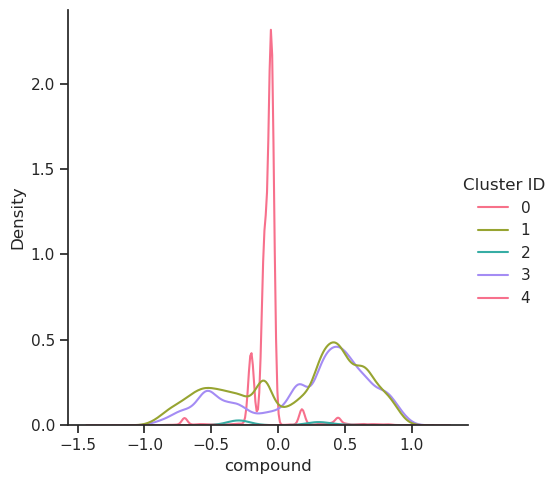

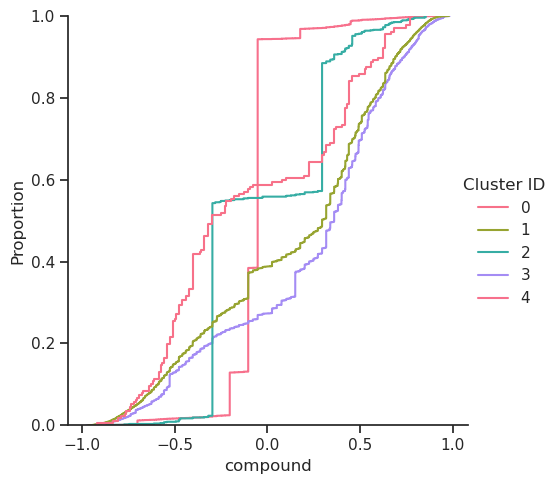

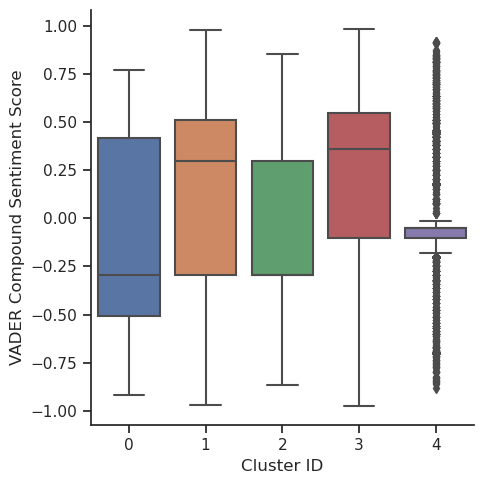

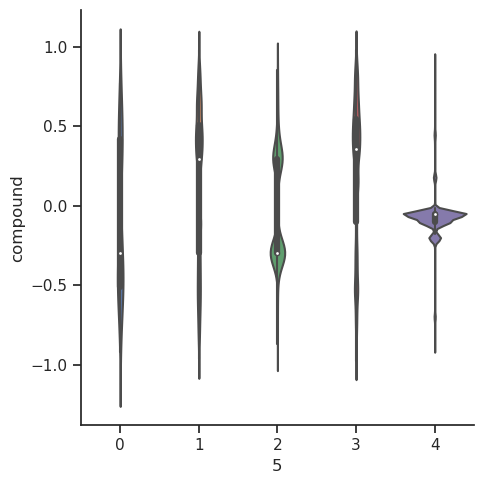

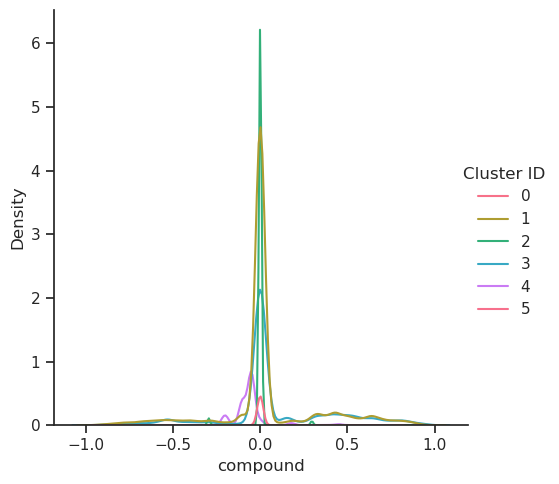

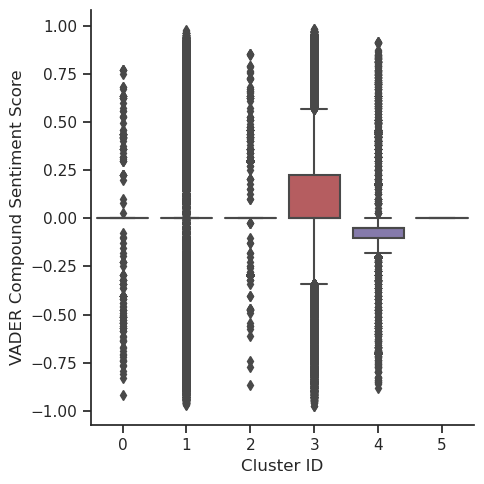

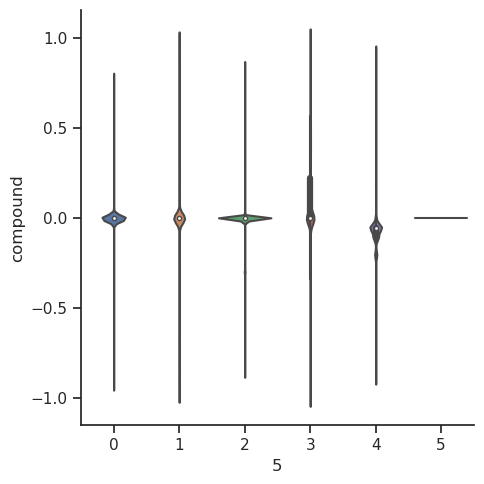

In [46]:
import math
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set_style("whitegrid")
sns.set_style("ticks")


tdata_neu = twitter_data[(twitter_data["compound"] == 0)].index
tdata_neu_normalized = twitter_data.drop(tdata_neu)
tdata_neu_counts = tdata_neu.size
tdata_tot_counts = twitter_data["id"].size
proportion_of_neutral = tdata_neu_counts/tdata_tot_counts

##### Other visualizations ######
#sns.swarmplot(data=twitter_data, x="5", y="compound", color="k", size=3, ax=g.ax)


# TODO create timeline of all tweets (binned by month)

# Proportion of neutral posts to total post counts
print("Proportion of neutral posts to total post counts: ", proportion_of_neutral, "\n", tdata_neu_counts, "total tweets removed")

# Plot with neutral values removed
sns.displot(tdata_neu_normalized, x="compound", hue="5", kind="kde", palette="husl").legend.set_title("Cluster ID")
sns.displot(tdata_neu_normalized, x="compound", hue="5", kind="ecdf", palette="husl").legend.set_title("Cluster ID")
sns.catplot(data=tdata_neu_normalized, x="5", y="compound", kind="box").set(xlabel="Cluster ID", ylabel="VADER Compound Sentiment Score")
sns.catplot(data=tdata_neu_normalized, x="5", y="compound", kind="violin")

# Plot with neutral included
sns.displot(twitter_data, x="compound", hue="5", kind="kde", palette="husl").legend.set_title("Cluster ID")
sns.catplot(data=twitter_data, x="5", y="compound", kind="box").set(xlabel="Cluster ID", ylabel="VADER Compound Sentiment Score")
sns.catplot(data=twitter_data, x="5", y="compound", kind="violin")


plt.show()

# plt.legend(title="Cluster ID")



